# DBSCAN

## Example  blobs

/home/seetha/PythonScriptsCourses/PythonScriptsCourses/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


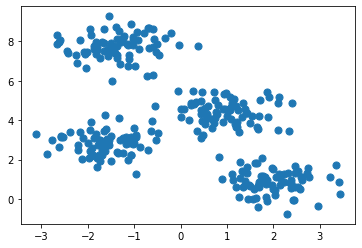

In [3]:
from sklearn.datasets.samples_generator import make_blobs

import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

plt.show()

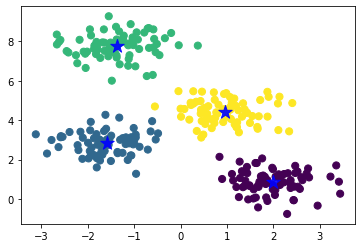

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='b', s=200, alpha=0.9, marker = '*');

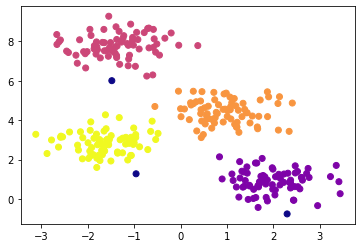

In [5]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.65, min_samples = 2)
clusters = dbscan.fit_predict(X)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")

In [6]:
from sklearn.metrics.cluster import adjusted_rand_score

# The Rand Index computes a similarity measure between two clusterings 
# by considering all pairs of samples and counting pairs that are assigned 
# in the same or different clusters in the predicted and true clusterings.

# The raw RI score is then “adjusted for chance” into the ARI score
# ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)


#k-means performance:
print("ARI =", adjusted_rand_score(y_true, y_kmeans)*100)

#DBSCAN performance:
print("ARI =", adjusted_rand_score(y_true, clusters)*100)

ARI = 100.0
ARI = 98.64417703510992


## Example Moons

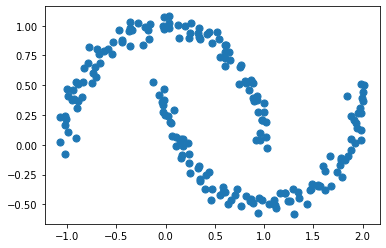

In [9]:
from sklearn.datasets import make_moons

import matplotlib.pyplot as plt

Xm, ym = make_moons(200, noise=.05, random_state=0)

plt.scatter(Xm[:, 0], Xm[:, 1], s=50)

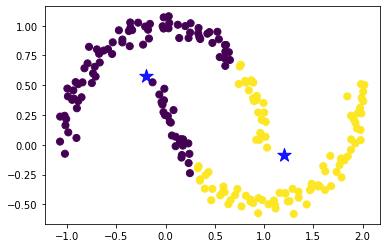

In [10]:
moons = KMeans(2, random_state=0)
ymk = moons.fit_predict(Xm)


plt.scatter(Xm[:, 0], Xm[:, 1],  c = moons.labels_, s=50, cmap='viridis')

moon_centers = moons.cluster_centers_
plt.scatter(moon_centers[:, 0], moon_centers[:, 1], 
            c='b', s=200, alpha=0.9, marker = '*')

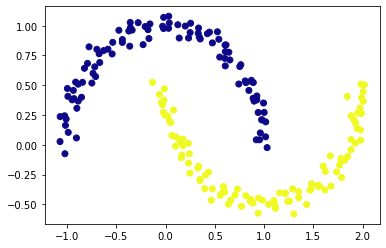

In [30]:
from sklearn.cluster import DBSCAN

moonsdb = DBSCAN(eps=0.2, min_samples = 5) # 0.2
cluster_moon = moonsdb.fit_predict(Xm)

# plot the cluster assignments
plt.scatter(Xm[:, 0], Xm[:, 1], c=cluster_moon, cmap="plasma")

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

# The Rand Index computes a similarity measure between two clusterings 
# by considering all pairs of samples and counting pairs that are assigned 
# in the same or different clusters in the predicted and true clusterings.

# The raw RI score is then “adjusted for chance” into the ARI score
# ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

#k-means performance:
print("ARI =", adjusted_rand_score(ym, ymk)*100)

#DBSCAN performance:
print("ARI =", adjusted_rand_score(ym, cluster_moon)*100)